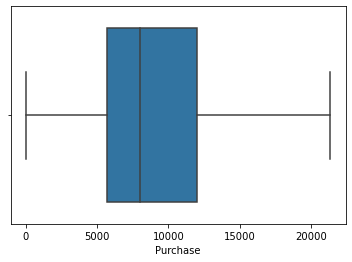

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random
import xgboost as xgb
from sklearn import preprocessing
from math import sqrt
train1 = pd.read_csv("train.csv")
test1 = pd.read_csv("test.csv")
top = np.percentile(train1.Purchase,99.5)
sns.boxplot(x=train1[ (train1['Purchase']<top)].Purchase)
train1 = train1[ (train1['Purchase']<top) ]
test1['Purchase']=test1.index
user_id_to_category_map = {}
customer_purchase_power = train1.groupby("User_ID")["Purchase"].sum()
#customer_purchase_power.median()

values = customer_purchase_power.iteritems()
for key, val in values:
    if val <= 143662.0:
        user_id_to_category_map[key] = 1
    elif val <= 202156.0:
        user_id_to_category_map[key] = 2
    elif val <= 275408.0:
        user_id_to_category_map[key] = 3
    elif val <= 378451.0:
        user_id_to_category_map[key] = 4
    elif val <= 513874.0:
        user_id_to_category_map[key] = 5
    elif val <= 687241.0:
        user_id_to_category_map[key] = 6
    elif val <= 934097.0:
        user_id_to_category_map[key] = 7
    elif val <= 1332584.0:
        user_id_to_category_map[key] = 8
    elif val <= 2029891.0:
        user_id_to_category_map[key] = 9
    else:
        user_id_to_category_map[key] = 10
customer_purchase_power.median()
def get_customer_category(user_id):
    if user_id in user_id_to_category_map:
        return user_id_to_category_map[user_id]
    return 5
train1["Purchasing_power"] = list(map(lambda user_id: get_customer_category(user_id), train1["User_ID"]))
test1["Purchasing_power"] = list(map(lambda user_id: get_customer_category(user_id), test1["User_ID"]))
#test1.head()
train1 = train1.append(test1,sort=False,ignore_index=True)
train1.fillna(-999,inplace=True)

#OneHot Encoding of City Category - 
train1=pd.get_dummies(train1, columns=['City_Category'])
train1['Product_Category_2'] = train1['Product_Category_2'].astype(int)
train1['Product_Category_3'] = train1['Product_Category_3'].astype(int)
train=train1[:547316]
test=train1[547316:]
test=test.drop(['Purchase'],1)

In [8]:
train["UID_Min"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['UID_Min'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["UID_MaxP"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['UID_MaxP'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["PID_MinP"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['PID_MinP'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["PID_MaxP"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['PID_MaxP'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
uID_count = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:uID_count.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
pID_count = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:pID_count.get(x,0))

train["UID_MeanP"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['UID_MeanP'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))

train["PID_MeanP"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['PID_MeanP'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))

train["Pc1_MeanP"] = train.groupby(['Product_Category_1'])['Purchase'].transform('mean')
pc1_mean_dict = train.groupby(['Product_Category_1'])['Purchase'].mean().to_dict()
test['Pc1_MeanP'] = test['Product_Category_1'].apply(lambda x:pc1_mean_dict.get(x,0))

train["Pc1_MinP"] = train.groupby(['Product_Category_1'])['Purchase'].transform('min')
pc1_min_dict = train.groupby(['Product_Category_1'])['Purchase'].min().to_dict()
test['Pc1_MinP'] = test['Product_Category_1'].apply(lambda x:pc1_min_dict.get(x,0))

train["Pc1_MaxP"] = train.groupby(['Product_Category_1'])['Purchase'].transform('max')
pc1_max_dict = train.groupby(['Product_Category_1'])['Purchase'].max().to_dict()
test['Pc1_MaxP'] = test['Product_Category_1'].apply(lambda x:pc1_max_dict.get(x,0))

train["Pc2_MeanP"] = train.groupby(['Product_Category_2'])['Purchase'].transform('mean')
pc2_mean_dict = train.groupby(['Product_Category_2'])['Purchase'].mean().to_dict()
test['Pc2_MeanP'] = test['Product_Category_2'].apply(lambda x:pc2_mean_dict.get(x,0))

train["Pc2_MinP"] = train.groupby(['Product_Category_2'])['Purchase'].transform('min')
pc2_min_dict = train.groupby(['Product_Category_2'])['Purchase'].min().to_dict()
test['Pc2_MinP'] = test['Product_Category_2'].apply(lambda x:pc2_min_dict.get(x,0))

train["Pc2_MaxP"] = train.groupby(['Product_Category_2'])['Purchase'].transform('max')
pc2_max_dict = train.groupby(['Product_Category_2'])['Purchase'].max().to_dict()
test['Pc2_MaxP'] = test['Product_Category_2'].apply(lambda x:pc2_max_dict.get(x,0))

train["Pc3_MeanP"] = train.groupby(['Product_Category_3'])['Purchase'].transform('mean')
pc3_mean_dict = train.groupby(['Product_Category_3'])['Purchase'].mean().to_dict()
test['Pc3_MeanP'] = test['Product_Category_3'].apply(lambda x:pc3_mean_dict.get(x,0))

train["Pc3_MinP"] = train.groupby(['Product_Category_3'])['Purchase'].transform('min')
pc3_min_dict = train.groupby(['Product_Category_3'])['Purchase'].min().to_dict()
test['Pc3_MinP'] = test['Product_Category_3'].apply(lambda x:pc3_min_dict.get(x,0))

train["Pc3_MaxP"] = train.groupby(['Product_Category_3'])['Purchase'].transform('max')
pc3_max_dict = train.groupby(['Product_Category_3'])['Purchase'].max().to_dict()
test['Pc3_MaxP'] = test['Product_Category_3'].apply(lambda x:pc3_max_dict.get(x,0))

userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['UID_25Perc'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['UID_25Perc'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_50p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,50.)).to_dict()
train['UID_50Perc'] = train['User_ID'].apply(lambda x:userID_50p_dict.get(x,0))
test['UID_50Perc'] = test['User_ID'].apply(lambda x:userID_50p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['UID_75Perc'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['UID_75Perc'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['PID_25Perc'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['PID_25Perc'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_50p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,50)).to_dict()
train['PID_50Perc'] = train['Product_ID'].apply(lambda x:productID_50p_dict.get(x,0))
test['PID_50Perc'] = test['Product_ID'].apply(lambda x:productID_50p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['PID_75Perc'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['PID_75Perc'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))

pc1_25p_dict = train.groupby(['Product_Category_1'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Pc1_25Perc'] = train['Product_Category_1'].apply(lambda x:pc1_25p_dict.get(x,0))
test['Pc1_25Perc'] = test['Product_Category_1'].apply(lambda x:pc1_25p_dict.get(x,0))

pc1_50p_dict = train.groupby(['Product_Category_1'])['Purchase'].apply(lambda x:np.percentile(x,50)).to_dict()
train['Pc1_50Perc'] = train['Product_Category_1'].apply(lambda x:pc1_50p_dict.get(x,0))
test['Pc1_50Perc'] = test['Product_Category_1'].apply(lambda x:pc1_50p_dict.get(x,0))

pc1_75p_dict = train.groupby(['Product_Category_1'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Pc1_75Perc'] = train['Product_Category_1'].apply(lambda x:pc1_75p_dict.get(x,0))
test['Pc1_75Perc'] = test['Product_Category_1'].apply(lambda x:pc1_75p_dict.get(x,0))


pc2_25p_dict = train.groupby(['Product_Category_2'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Pc2_25Perc'] = train['Product_Category_2'].apply(lambda x:pc2_25p_dict.get(x,0))
test['Pc2_25Perc'] = test['Product_Category_2'].apply(lambda x:pc2_25p_dict.get(x,0))

pc2_50p_dict = train.groupby(['Product_Category_2'])['Purchase'].apply(lambda x:np.percentile(x,50)).to_dict()
train['Pc2_50Perc'] = train['Product_Category_2'].apply(lambda x:pc2_50p_dict.get(x,0))
test['Pc2_50Perc'] = test['Product_Category_2'].apply(lambda x:pc2_50p_dict.get(x,0))

pc2_75p_dict = train.groupby(['Product_Category_2'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Pc2_75Perc'] = train['Product_Category_2'].apply(lambda x:pc2_75p_dict.get(x,0))
test['Pc2_75Perc'] = test['Product_Category_2'].apply(lambda x:pc2_75p_dict.get(x,0))

pc3_25p_dict = train.groupby(['Product_Category_3'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Pc3_25Perc'] = train['Product_Category_3'].apply(lambda x:pc3_25p_dict.get(x,0))
test['Pc3_25Perc'] = test['Product_Category_3'].apply(lambda x:pc3_25p_dict.get(x,0))

pc3_50p_dict = train.groupby(['Product_Category_3'])['Purchase'].apply(lambda x:np.percentile(x,50)).to_dict()
train['Pc3_50Perc'] = train['Product_Category_3'].apply(lambda x:pc3_50p_dict.get(x,0))
test['Pc3_50Perc'] = test['Product_Category_3'].apply(lambda x:pc3_50p_dict.get(x,0))

pc3_75p_dict = train.groupby(['Product_Category_3'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Pc3_75Perc'] = train['Product_Category_3'].apply(lambda x:pc3_75p_dict.get(x,0))
test['Pc3_75Perc'] = test['Product_Category_3'].apply(lambda x:pc3_75p_dict.get(x,0))

train["Occupation_Count"] = train.groupby(['Occupation'])['Occupation'].transform('count')
occupation_count_dict = train.groupby(['Occupation']).size().to_dict()
test['Occupation_Count'] = test['Occupation'].apply(lambda x:occupation_count_dict.get(x,0))

train["Age_Count"] = train.groupby(['Age'])['Age'].transform('count')
age_count_dict = train.groupby(['Age']).size().to_dict()
test['Age_Count'] = test['Age'].apply(lambda x:age_count_dict.get(x,0))

train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_2_Count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_Count'] = test['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

train["Product_Category_3_Count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_Count'] = test['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

<ipython-input-8-64a2cb926dd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["UID_Min"] = train.groupby(['User_ID'])['Purchase'].transform('min')
<ipython-input-8-64a2cb926dd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["UID_MaxP"] = train.groupby(['User_ID'])['Purchase'].transform('max')
<ipython-input-8-64a2cb926dd5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<ipython-input-8-64a2cb926dd5>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['PID_50Perc'] = train['Product_ID'].apply(lambda x:productID_50p_dict.get(x,0))
<ipython-input-8-64a2cb926dd5>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['PID_75Perc'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
<ipython-input-8-64a2cb926dd5>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
gender_dict = {'F':0, 'M':1}
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
stay_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}

train["Gender"] = train["Gender"].apply(lambda x: gender_dict[x])
test["Gender"] = test["Gender"].apply(lambda x: gender_dict[x])

train["Age"] = train["Age"].apply(lambda x: age_dict[x])
test["Age"] = test["Age"].apply(lambda x: age_dict[x])

train["Stay_In_Current_City_Years"] = train["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])
test["Stay_In_Current_City_Years"] = test["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])

xg1 = pd.DataFrame()
xg1['User_ID'] = test['User_ID']
xg1['Product_ID'] = test['Product_ID']
cat_col=["User_ID", "Product_ID"]
for var in cat_col:
    lb = preprocessing.LabelEncoder()
    full_var_data = pd.concat((train[var], test[var]), axis=0).astype('str')
    lb.fit(full_var_data)
    train[var] = lb.transform(train[var].astype('str'))
    test[var] = lb.transform(test[var].astype('str'))
train_y = train["Purchase"]
train.drop(["Purchase"], axis=1, inplace=True)
train.dtypes

<ipython-input-9-4d8801a44f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Gender"] = train["Gender"].apply(lambda x: gender_dict[x])
<ipython-input-9-4d8801a44f54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"] = train["Age"].apply(lambda x: age_dict[x])
<ipython-input-9-4d8801a44f54>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

User_ID                         int32
Product_ID                      int32
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int32
Product_Category_3              int32
Purchasing_power                int64
City_Category_A                 uint8
City_Category_B                 uint8
City_Category_C                 uint8
UID_Min                         int64
UID_MaxP                        int64
PID_MinP                        int64
PID_MaxP                        int64
User_ID_Count                   int64
Product_ID_Count                int64
UID_MeanP                     float64
PID_MeanP                     float64
Pc1_MeanP                     float64
Pc1_MinP                        int64
Pc1_MaxP                        int64
Pc2_MeanP                     float64
Pc2_MinP    

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.05, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.03],
              'max_depth': [10],
              'min_child_weight': [5, 10],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 750]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(train,
         train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 88.9min finished


[18:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.7665551873834866
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 750, 'nthread': -1, 'objective': 'reg:linear', 'subsample': 0.8}


In [11]:
from xgboost.sklearn import XGBRegressor
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
params["n_estimators"]=750
num_rounds = 1500
plst = list(params.items())
xgtrain = xgb.DMatrix(train, label=train_y)
model = xgb.train(plst, xgtrain,num_rounds)
print('Done')

[21:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Done


In [12]:
xgtest = xgb.DMatrix(test)
pred=model.predict(xgtest)
print("Done")

Done


In [13]:
xg1['Purchase'] = pred
#sum(n < 30 for n in xg1["Purchase"].values.flatten())
xg1[xg1["Purchase"] < 0] = 0

In [14]:
xg1.to_csv('xgbfinal.csv',index=False)

In [16]:


feature_important = model.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new
feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
#feature_importances.style.set_properties(**{'font-size':'10pt'})



,Features,Importance (%)
0,PID_MeanP,46.78
1,PID_50Perc,10.87
2,PID_75Perc,9.30
3,PID_25Perc,5.16
4,UID_75Perc,1.26
5,UID_MeanP,1.22
6,UID_25Perc,1.01
7,UID_50Perc,0.97
8,Pc1_MaxP,0.90
9,Pc1_50Perc,0.78
